In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### ex. 1

In [116]:
# notare che senza le virgole nel file .csv non lo si riesce ad importare correttamente

df = pd.read_csv('./example.csv')
display(df)

,name,course1,course2,course3,course4
0,Marie,24,18,30,20
1,John,18,27,29,27
2,Kati,21,24,28,27
3,Olaf,30,30,29,30
4,Mark,24,25,27,21
5,Olga,23,26,30,30
6,Jean,18,28,26,24
7,Alex,19,20,27,27
8,Pier,24,29,23,26
9,Bennet,24,25,26,30


In [117]:
df.iloc[:, 1:5] = df.iloc[:, 1:5] + 5
display(df)

,name,course1,course2,course3,course4
0,Marie,29,23,35,25
1,John,23,32,34,32
2,Kati,26,29,33,32
3,Olaf,35,35,34,35
4,Mark,29,30,32,26
5,Olga,28,31,35,35
6,Jean,23,33,31,29
7,Alex,24,25,32,32
8,Pier,29,34,28,31
9,Bennet,29,30,31,35


In [118]:
df_par = df.iloc[:, 1:5]
df_par[df_par>30] = 30
df.iloc[:, 1:5] = df_par

display(df)

,name,course1,course2,course3,course4
0,Marie,29,23,30,25
1,John,23,30,30,30
2,Kati,26,29,30,30
3,Olaf,30,30,30,30
4,Mark,29,30,30,26
5,Olga,28,30,30,30
6,Jean,23,30,30,29
7,Alex,24,25,30,30
8,Pier,29,30,28,30
9,Bennet,29,30,30,30


In [119]:
df.to_csv('./example_mod.csv')

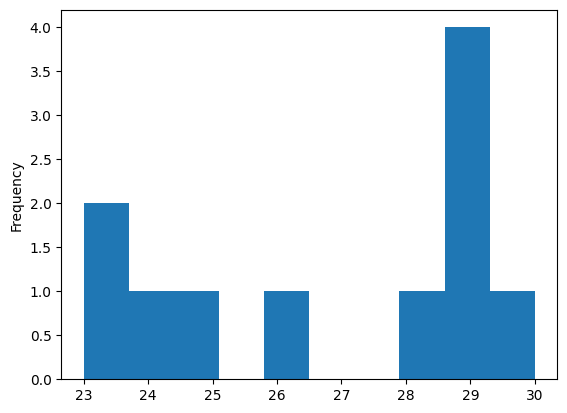

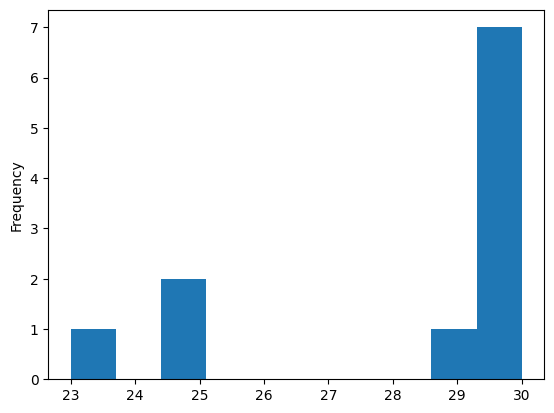

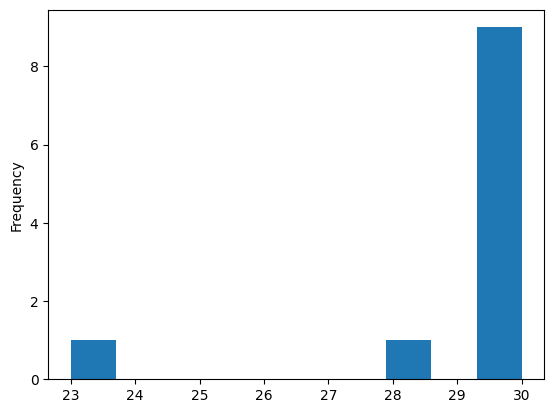

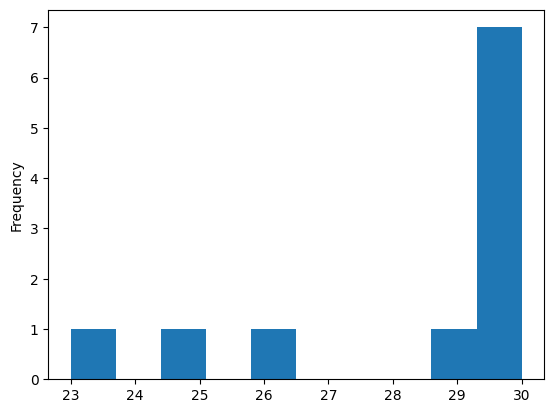

In [101]:
df[df.columns[1]].plot(kind = 'hist')
plt.show()
df[df.columns[2]].plot(kind = 'hist')
plt.show()
df[df.columns[3]].plot(kind = 'hist')
plt.show()
df[df.columns[4]].plot(kind = 'hist')
plt.show()

#### ex. 2

In [131]:
# reading dataframe

cars = pd.read_csv('cars.csv')
display(cars)

,Year,Make,Model,Length
0,1997,Ford,E350,2.34
1,2000,Mercury,Cougar,2.38
2,1993,Chevrolet,"Venture ""Extended Edition""",3.20
3,1999,Jeep,Grand Cherokee,2.56
4,1998,Dodge,Intrepid,3.01
5,1997,Ford,E350,2.34
6,1999,Ford,E350,2.34
7,1996,Ford,Mustang,2.37
8,2000,Ford,Mustang,2.34
9,1997,Ford,Taurus,2.34


In [132]:
# removing third row

cars.drop(2, inplace=True)
cars.reset_index(inplace=True)
cars.drop("index", axis='columns', inplace=True)
display(cars)

,Year,Make,Model,Length
0,1997,Ford,E350,2.34
1,2000,Mercury,Cougar,2.38
2,1999,Jeep,Grand Cherokee,2.56
3,1998,Dodge,Intrepid,3.01
4,1997,Ford,E350,2.34
5,1999,Ford,E350,2.34
6,1996,Ford,Mustang,2.37
7,2000,Ford,Mustang,2.34
8,1997,Ford,Taurus,2.34


In [133]:
# adding prices

# notare che se alla cella precedente non resetto gli indici, a questa ottengo uno strano output

cars = pd.concat((cars, pd.DataFrame({'Price': (8000, 6500, 6800, 7500, 7300, 7000, 9000, 6500, 7800)})), axis='columns')
display(cars)

,Year,Make,Model,Length,Price
0,1997,Ford,E350,2.34,8000
1,2000,Mercury,Cougar,2.38,6500
2,1999,Jeep,Grand Cherokee,2.56,6800
3,1998,Dodge,Intrepid,3.01,7500
4,1997,Ford,E350,2.34,7300
5,1999,Ford,E350,2.34,7000
6,1996,Ford,Mustang,2.37,9000
7,2000,Ford,Mustang,2.34,6500
8,1997,Ford,Taurus,2.34,7800


In [134]:
# replacing 'Ford' with 'Toyota'

mask_make = np.array(cars["Make"]=="Ford")
cars.loc[mask_make, "Make"] = "Toyota"

display(cars)

,Year,Make,Model,Length,Price
0,1997,Toyota,E350,2.34,8000
1,2000,Mercury,Cougar,2.38,6500
2,1999,Jeep,Grand Cherokee,2.56,6800
3,1998,Dodge,Intrepid,3.01,7500
4,1997,Toyota,E350,2.34,7300
5,1999,Toyota,E350,2.34,7000
6,1996,Toyota,Mustang,2.37,9000
7,2000,Toyota,Mustang,2.34,6500
8,1997,Toyota,Taurus,2.34,7800


In [135]:
# average length of vehicles

print(cars["Length"].mean())

2.4466666666666668


In [136]:
# median price of vehicles

print(cars["Price"].median())

7300.0


In [137]:
# creating new dataframe without rows with price <= 7000

indexes = np.where(cars["Price"] <= 7000)[0]
cars_expensive = cars.drop(np.array(indexes))
cars_expensive.reset_index(inplace=True)
cars_expensive.drop("index", axis=1, inplace=True)

display(cars_expensive)

,Year,Make,Model,Length,Price
0,1997,Toyota,E350,2.34,8000
1,1998,Dodge,Intrepid,3.01,7500
2,1997,Toyota,E350,2.34,7300
3,1996,Toyota,Mustang,2.37,9000
4,1997,Toyota,Taurus,2.34,7800


In [138]:
# creating new dataframe without rows with price <= 7000 and only with Toyota cars

indexes = np.where(cars_expensive['Make'] == 'Toyota')[0]
cars_expensive_Toyota = cars_expensive.drop(np.array(indexes))
cars_expensive_Toyota.reset_index(inplace=True)
cars_expensive_Toyota.drop("index", axis=1, inplace=True)

display(cars_expensive_Toyota)

,Year,Make,Model,Length,Price
0,1998,Dodge,Intrepid,3.01,7500


In [139]:
# sorting in descending ordere w.r.t. price

cars.sort_values('Price', axis=0, inplace=True, ascending=False)
cars.reset_index(inplace=True)
cars.drop("index", axis=1, inplace=True)

display(cars)

,Year,Make,Model,Length,Price
0,1996,Toyota,Mustang,2.37,9000
1,1997,Toyota,E350,2.34,8000
2,1997,Toyota,Taurus,2.34,7800
3,1998,Dodge,Intrepid,3.01,7500
4,1997,Toyota,E350,2.34,7300
5,1999,Toyota,E350,2.34,7000
6,1999,Jeep,Grand Cherokee,2.56,6800
7,2000,Mercury,Cougar,2.38,6500
8,2000,Toyota,Mustang,2.34,6500
